# 02 - Feature Engineering

## Purpose
Generate time series features such as lagged returns, SMA, and volatility

## Code

In [ ]:
import pandas as pd  # For data manipulation and analysis
import os  # For file system operations like creating directories

def generate_features(df):
    """
    Generate technical indicators and features from raw price data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Raw stock data with at least 'Close' price column
        
    Returns:
    --------
    pandas.DataFrame
        Processed dataframe with additional technical features
    """
    df = df.copy()  # Create a copy to avoid modifying the original dataframe
    
    # Convert 'Close' column to numeric type
    # errors='coerce' will convert non-convertible values to NaN instead of raising an error
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    
    # Calculate daily returns (percentage change from previous day)
    # fill_method=None avoids using forward/backward filling which could leak future data
    df['Return'] = df['Close'].pct_change(fill_method=None)
    
    # Add lagged returns to capture time-series autocorrelation patterns
    # Lag_1 = previous day's return, Lag_2 = return from two days ago
    # These features help the model recognize recent market patterns
    df['Lag_1'] = df['Return'].shift(1)  # Shift values down by 1 row (1 day lag)
    df['Lag_2'] = df['Return'].shift(2)  # Shift values down by 2 rows (2 day lag)
    
    # Calculate Simple Moving Averages (SMA) for trend identification
    # SMA_5 = 5-day moving average (short-term trend)
    # SMA_10 = 10-day moving average (medium-term trend)
    df['SMA_5'] = df['Close'].rolling(window=5).mean()  # Average of last 5 days
    df['SMA_10'] = df['Close'].rolling(window=10).mean()  # Average of last 10 days
    
    # Calculate volatility as standard deviation of returns over 10-day window
    # Higher values indicate more market uncertainty and price fluctuation
    df['Volatility'] = df['Return'].rolling(window=10).std()
    
    # Remove rows with NaN values resulting from calculations requiring history
    # This ensures all data points have complete feature information
    return df.dropna()

# Create directory for storing processed data files if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# List of stock tickers from different market sectors to process
tickers = ['AAPL', 'MSFT', 'JPM', 'BAC', 'XOM', 'CVX']  # Tech, Banking, and Energy sectors

# Process each ticker file individually
for ticker in tickers:
    # Read raw data from CSV file with dates as index
    df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)
    
    # Ensure the index column is named 'Date' for consistency
    df.index.name = 'Date'
    
    # Generate technical features for this ticker
    processed = generate_features(df)
    
    # Save the processed data to CSV in the processed directory
    processed.to_csv(f'../data/processed/{ticker}_processed.csv')
    
    # Print confirmation message
    print(f"{ticker} processed.")

AAPL processed.
MSFT processed.
JPM processed.
BAC processed.
XOM processed.
CVX processed.


/var/folders/t1/dn02mwbj2470p7qc91_h3c1w0000gn/T/ipykernel_28559/3209643988.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)
/var/folders/t1/dn02mwbj2470p7qc91_h3c1w0000gn/T/ipykernel_28559/3209643988.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)
/var/folders/t1/dn02mwbj2470p7qc91_h3c1w0000gn/T/ipykernel_28559/3209643988.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f'../data/raw/

Loaded AAPL data with 1248 rows and 11 columns
Loaded MSFT data with 1248 rows and 11 columns
Loaded JPM data with 1248 rows and 11 columns
Loaded BAC data with 1248 rows and 11 columns
Loaded XOM data with 1248 rows and 11 columns
Loaded CVX data with 1248 rows and 11 columns

Apple (AAPL) processed data sample:
                Close       High        Low       Open     Volume    Return  \
Date                                                                          
2020-01-16  76.321007  76.432380  75.558379  75.921536  108829200  0.012526   
2020-01-17  77.165939  77.168355  76.262887  76.570357  137816400  0.011071   
2020-01-21  76.643013  77.236165  76.505012  76.793117  110843200 -0.006777   
2020-01-22  76.916580  77.470994  76.822156  77.129626  101832400  0.003569   
2020-01-23  77.287010  77.366901  76.420272  76.969854  104472000  0.004816   

               Lag_1     Lag_2      SMA_5     SMA_10  Volatility  
Date                                                            

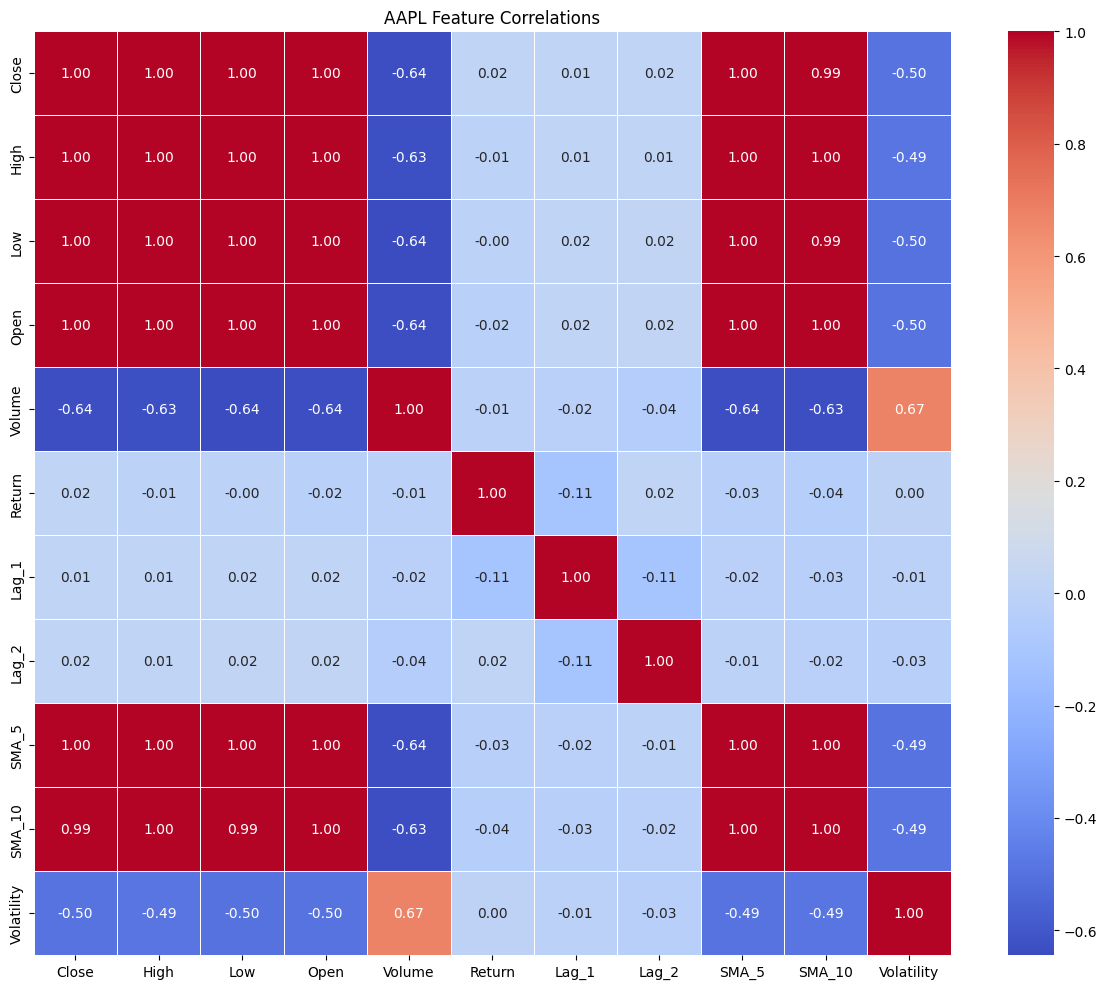

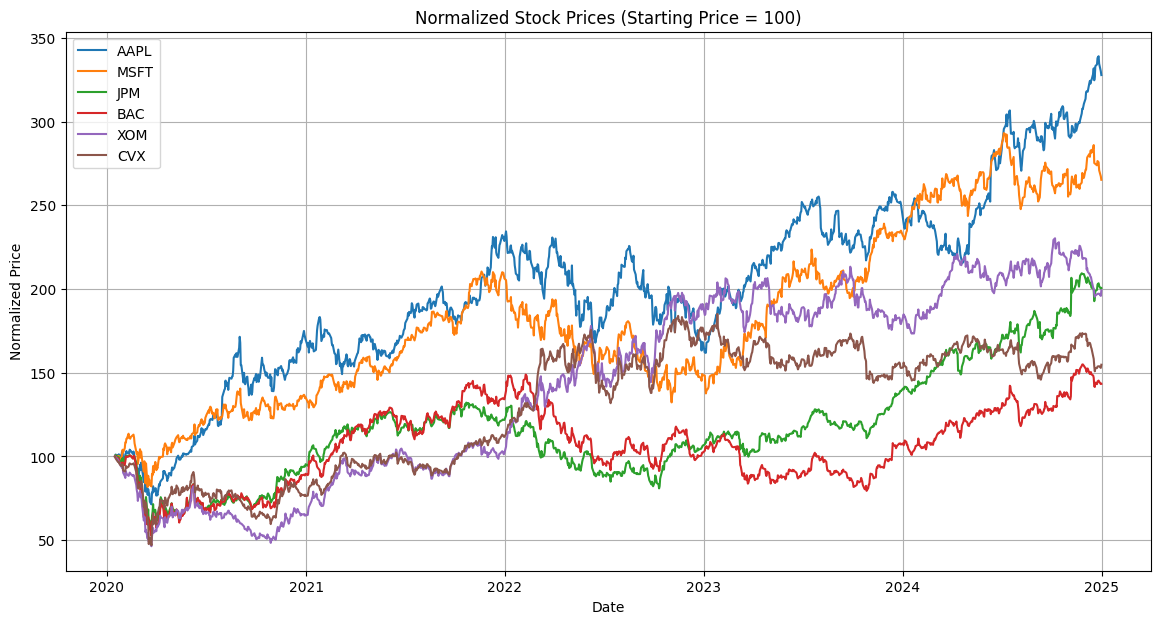

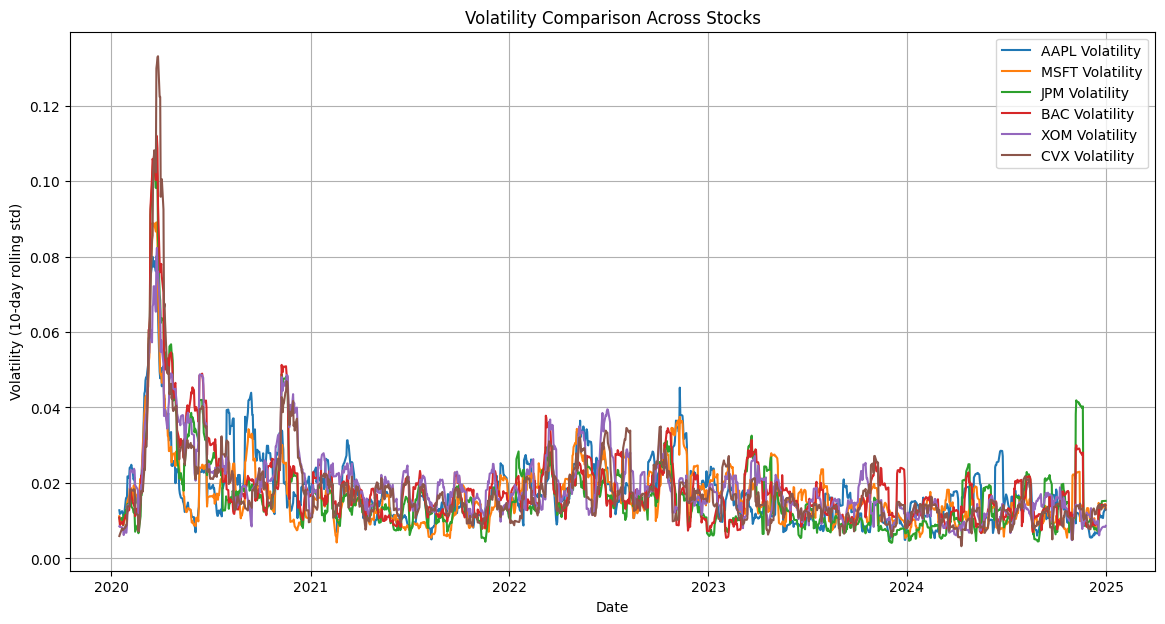


Sector average statistics:
       Technology_Avg_Return  Technology_Avg_Volatility  Finance_Avg_Return  \
count            1248.000000                1248.000000         1248.000000   
mean                0.001072                   0.017345            0.000657   
std                 0.018353                   0.009359            0.020986   
min                -0.138019                   0.005157           -0.151811   
25%                -0.007778                   0.012042           -0.008869   
50%                 0.001343                   0.015075            0.000565   
75%                 0.011108                   0.020160            0.010599   
max                 0.130989                   0.084554            0.179043   

       Finance_Avg_Volatility  Energy_Avg_Return  Energy_Avg_Volatility  
count             1248.000000        1248.000000            1248.000000  
mean                 0.017886           0.000698               0.018714  
std                  0.012156         

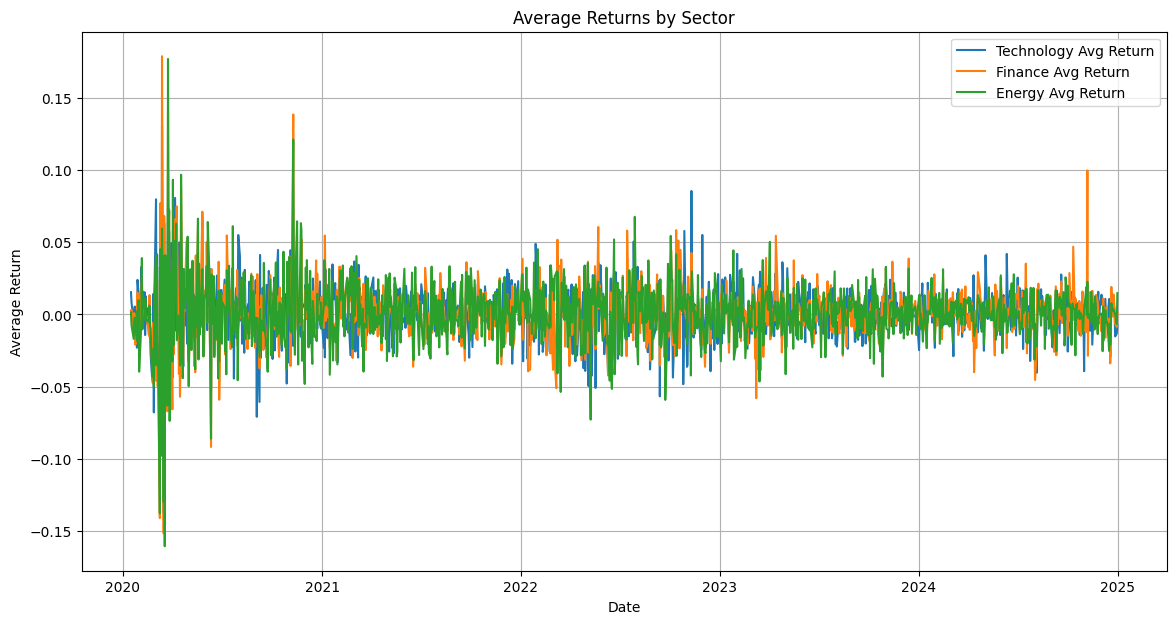

In [2]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import os  # For file system operations
import seaborn as sns  # For enhanced visualizations

# List of stock tickers we've processed
tickers = ['AAPL', 'MSFT', 'JPM', 'BAC', 'XOM', 'CVX']

# Create a dictionary to store DataFrames for each ticker
processed_dfs = {}

# Load each processed CSV file into the dictionary
for ticker in tickers:
    file_path = f'../data/processed/{ticker}_processed.csv'
    processed_dfs[ticker] = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    print(f"Loaded {ticker} data with {processed_dfs[ticker].shape[0]} rows and {processed_dfs[ticker].shape[1]} columns")

# Show the first 5 rows of AAPL processed data
print("\nApple (AAPL) processed data sample:")
print(processed_dfs['AAPL'].head())

# Display summary statistics for AAPL
print("\nApple (AAPL) summary statistics:")
print(processed_dfs['AAPL'].describe())

# Create a correlation heatmap for AAPL features
print("\nCorrelation between AAPL features:")
plt.figure(figsize=(12, 10))
sns.heatmap(processed_dfs['AAPL'].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('AAPL Feature Correlations')
plt.tight_layout()
plt.show()

# Plot closing prices for all tickers on the same chart
plt.figure(figsize=(14, 7))
for ticker in tickers:
    # Normalize to starting price of 100 for comparison
    normalized_price = processed_dfs[ticker]['Close'] / processed_dfs[ticker]['Close'].iloc[0] * 100
    plt.plot(processed_dfs[ticker].index, normalized_price, label=ticker)

plt.title('Normalized Stock Prices (Starting Price = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Display volatility comparison
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(processed_dfs[ticker].index, processed_dfs[ticker]['Volatility'], label=f"{ticker} Volatility")

plt.title('Volatility Comparison Across Stocks')
plt.xlabel('Date')
plt.ylabel('Volatility (10-day rolling std)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and display average technical indicators for each sector
tech_stocks = ['AAPL', 'MSFT']
finance_stocks = ['JPM', 'BAC']
energy_stocks = ['XOM', 'CVX']

sectors = {
    'Technology': tech_stocks,
    'Finance': finance_stocks,
    'Energy': energy_stocks
}

# Create a DataFrame to store sector averages
sector_stats = pd.DataFrame()

for sector_name, sector_tickers in sectors.items():
    # Combine returns from all stocks in the sector
    sector_returns = pd.concat([processed_dfs[ticker]['Return'] for ticker in sector_tickers], axis=1)
    sector_stats[f'{sector_name}_Avg_Return'] = sector_returns.mean(axis=1)
    
    # Combine volatility from all stocks in the sector
    sector_volatility = pd.concat([processed_dfs[ticker]['Volatility'] for ticker in sector_tickers], axis=1)
    sector_stats[f'{sector_name}_Avg_Volatility'] = sector_volatility.mean(axis=1)

# Display sector statistics
print("\nSector average statistics:")
print(sector_stats.describe())

# Plot sector average returns
plt.figure(figsize=(14, 7))
for sector in sectors.keys():
    plt.plot(sector_stats.index, sector_stats[f'{sector}_Avg_Return'], label=f"{sector} Avg Return")

plt.title('Average Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Average Return')
plt.legend()
plt.grid(True)
plt.show()